<a href="https://colab.research.google.com/github/Ari2501/Inteligencia-Artificial-AJHP/blob/main/Perceptr%C3%B3nFDPersonal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.0654

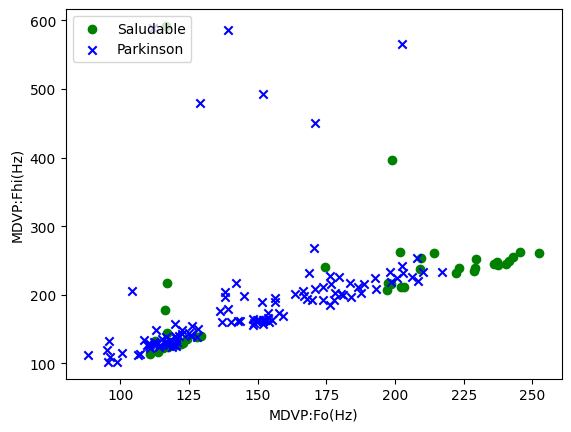

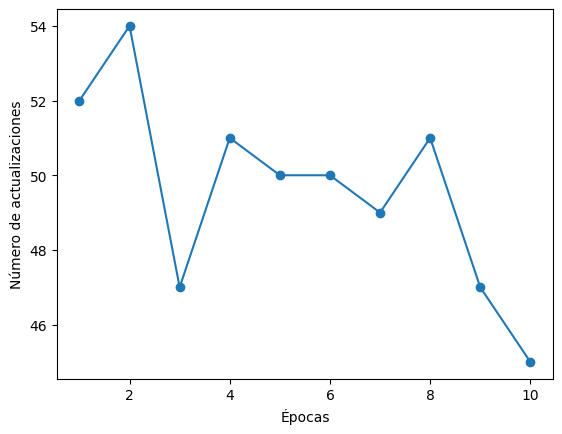

Predicciones: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
Valores reales: [ 1  1  1 -1  1  1  1  1 -1  1  1 -1  1  1  1 -1  1  1  1  1 -1  1  1  1
  1  1  1  1  1 -1  1 -1  1 -1  1  1 -1  1 -1]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Perceptron dado por la maestra
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

# Para leer el dataset de parkinson que me tocó
df = pd.read_csv('/content/parkinsons.data', sep=',')

print(df.head())

# Aquí uso dos características: 'MDVP:Fo(Hz)' y 'MDVP:Fhi(Hz)'
X = df[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)']].values

# 'status' (0 = saludable, 1 = parkinson)
y = df['status'].values
# Se convierte 'status' a (-1, 1) para el Perceptrón
y = np.where(y == 0, -1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#aquí cambié el rojo de la maestra por el verde
plt.scatter(X_train[y_train == -1, 0], X_train[y_train == -1, 1], color='green', marker='o', label='Saludable')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='blue', marker='x', label='Parkinson')

plt.xlabel('MDVP:Fo(Hz)')
plt.ylabel('MDVP:Fhi(Hz)')
plt.legend(loc='upper left')
plt.show()

# entreno de Perceptrón
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X_train, y_train)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Número de actualizaciones')
plt.show()

# Predecir el conjunto de prueba
y_pred = ppn.predict(X_test)

# Aquí muestra los resultados
print("Predicciones:", y_pred)
print("Valores reales:", y_test)
